 #                                                         TP 1 (TD 1)

#  Exercice 1

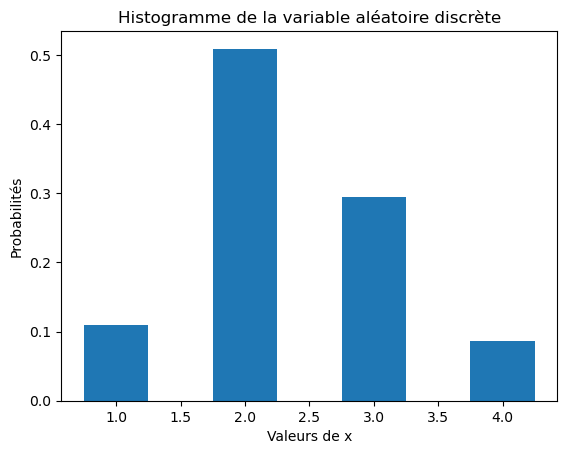

In [1]:
%matplotlib inline
from matplotlib.pyplot import *
from math import *
from numpy import *
from numpy.random import *
from scipy.misc import *
#from scipy import *
import matplotlib.pyplot as plt

#question 2 :

def discret(x,p,N):
    X=np.zeros(N)
    s=np.cumsum(p)
    for k in range(N):
        i=0
        u=random()
        while u > s[i]:
            i=i+1
        X[k]=x[i]
    return(X)

#question 3: 

x=[1,2,3,4]
p=[0.1,0.5,0.3,0.1] 

# liste de valeurs de la simulation de la v.a.
valeurs = discret(x,p,1000)

x=x+[x[-1]+1] #rajout d'une valeur dans x pour mieux l'afficher

#histogramme à partir de ces valeurs
hist, bins = np.histogram(valeurs, bins = x )  # Les bords des bacs

#probabilités en divisant par le nombre total d'éléments
probabilites = hist / len(valeurs)

#Barres d'histogramme
plt.bar(bins[:-1], probabilites, width=0.5, align='center')

# Étiquettes des axes
plt.xlabel('Valeurs de x')
plt.ylabel('Probabilités')

# titre du graph
plt.title('Histogramme de la variable aléatoire discrète')

# affiche le graphique
plt.show()



On remarque sur l'histogramme que les probabilités de x correspondent bien aux valeurs rentrées dans la fonction. En effet ici, on a mis x=[1,2,3,4] pour proba successive p=[0.1,0.5,0.3,0.1]

# Exercice 2

In [2]:
def binom(n,p,m):
    X=np.zeros(m)  #initialisation de la simulation de la v.a. de taille m
    
    for i in range(n): #on somme n fois les bernouilli de paramètre p
        X = X + np.array(discret([0,1],[1-p,p],m))  #X1 + X2 + ... + Xn
    return X

binom(10,0.3,100)

array([3., 3., 2., 3., 4., 1., 2., 4., 1., 4., 3., 2., 3., 2., 5., 4., 2.,
       4., 1., 4., 4., 2., 2., 1., 3., 4., 3., 3., 4., 2., 5., 6., 0., 5.,
       5., 2., 3., 3., 4., 3., 3., 2., 2., 1., 4., 2., 2., 4., 3., 3., 3.,
       3., 3., 1., 5., 5., 4., 1., 2., 2., 4., 4., 3., 3., 1., 2., 1., 3.,
       5., 4., 1., 3., 2., 1., 5., 3., 4., 2., 0., 2., 2., 6., 1., 3., 3.,
       4., 2., 3., 3., 1., 3., 3., 3., 3., 1., 4., 3., 1., 4., 4.])

Pour une binomial de paramètre (n,p), on somme n bernoulli de paramètre p simulée avec m valeurs.

# Exercice 3

In [3]:
# question 2:

def inversion_weibull(N):
    X=np.zeros(N)
    for k in range(1,N):
        u=random()
        X[k]=((np.log(1/(1-u)))**(1/3))
    return(X)

print(inversion(10))

# question 5 :

#moyenne empirique 
A =inversion_weibull(100)
B=np.cumsum(A)
C=[]
for k in range(1,100):
    C.append(B[k]/k)
    
plt.plot(C)#On voit que sa converge presque surement  vers 0.9 a peu près
plt.show()



NameError: name 'inversion' is not defined

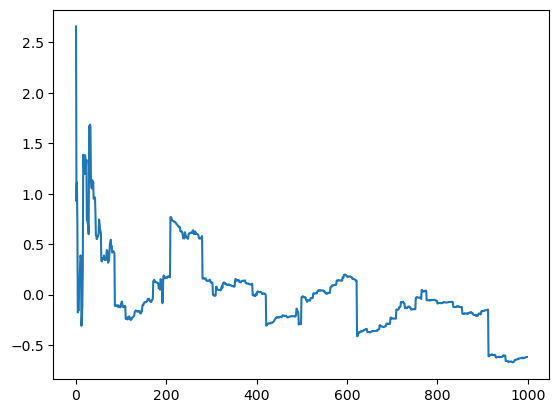

In [4]:
    
# question 6 (Loi de cauchy avec c=1):

def inversion_cauchy(N):
    X=np.zeros(N)
    for k in range(N):
        u=random()
        X[k]=(np.tan(np.pi*u-np.pi/2))
    return(X)


#moyenne empirique 

A =inversion_cauchy(1000)
B=np.cumsum(A)               
C=[]
for k in range(1,1000):
    C.append(B[k]/k)
    
plt.plot(C)#On voit que sa ne converge pas 
plt.show()



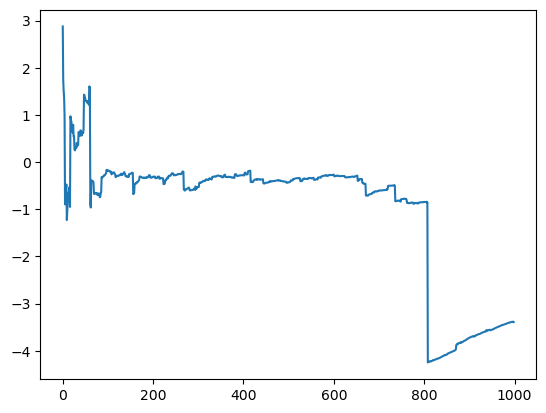

In [5]:
# question 7 :
A=[]
for k in range(1,1000):
    A.append(inversion_cauchy(1000))
B=cumsum(A)
C=[]
for j in range(1,1000):
    C.append(B[j]/j)   
    
plt.plot(C) #On voit que sa vers la loi de cauchy (une convergence vers 0.9 a peu près)
plt.show()

# Exercice 7: cardioide pour a=1

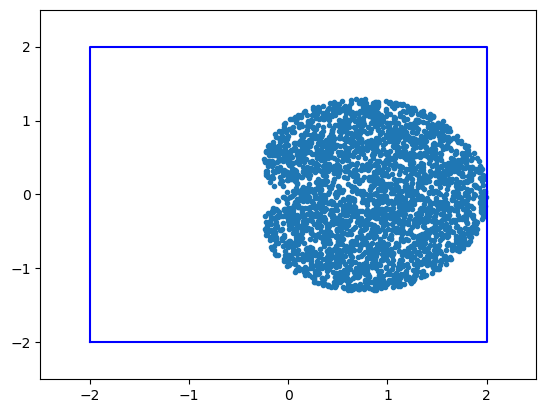

In [6]:

#Question 3:

N=10**4
a=1
U=4*a*rand(N)-2*a
V=4*a*rand(N)-2*a
X=[]
Y=[]
for k in range(N):
    if(((U[k])**2 +(V[k])**2-U[k])**2)<=(U[k])**2 +(V[k])**2:
        X.append(U[k])
        Y.append(V[k])

xlim((-2.5, 2.5))
ylim((-2.5, 2.5))
plot(X,Y,'.')

x = [-2*a, 2*a, 2*a, -2*a, -2*a]
y = [-2*a, -2*a, 2*a, 2*a, -2*a]

# Tracer le rectangle
plt.plot(x, y, 'b-')  # 'b-' signifie une ligne bleue solide




question 5:
Pour diminuer la proba de reject il faut que le pavé soit le plus proche possible de la cardioide.

# TP1 (TD2) Méthode de Monte-Carlo

### Exercice 4 : Réduction de la variance ( à rendre )

On cherche à calculer $I = \int_{0}^{1} e^{x^2} dx$ par la méthode de Monte-Carlo.

Question : Donner un code numérique pour cette méthode utilisant $n$ tirages indépendants d’une variable aléatoire

1) On utilise la loi des grands nombres qui permet nous dire que $\dfrac 1n \sum_{i=0}^{n} e^{U_{i}²}  \to  \mathbb{E}(e^{U^2}) = I$ quand $n \to +\infty $ avec $U_{i} \stackrel{i.i.d.}{\sim} \mathcal{U}([0,1])$ et $U {\sim}\mathcal{U}([0,1])$

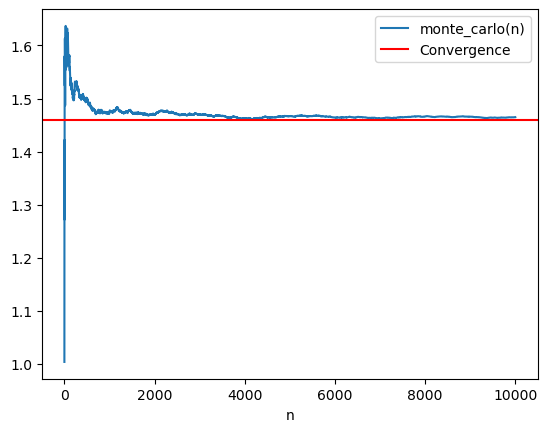

La valeur approché de I est : 1.4648034503096312


In [23]:
# question 1 : 

N=10000
A=[]
for k in range(1,N):         # On fait une 1ère boucle pour stocker les valeurs de exp(u^2) dans une liste A
    u=random()
    A.append(np.exp(u**2))
    
B=np.cumsum(A)               # On fait la somme cumulé de la liste A 
C=[]

for i in range(1,N):      # On fait une 2nd boucle pour stocker les valeur de la somme cumulés divisé par i pour chaque i allant de 1 à N-1 dans une liste C.
    C.append(B[i-1]/i)

plt.plot(C,label = 'monte_carlo(n)')  #Trace les points de I en fonction des n successivement)
plt.axhline(y =1.46, color ="r", label = 'Convergence') #Trait rouge horiztontale à 1.46 pour mieux observer la convergence
plt.xlabel('n') #Legende de l'axe 
plt.legend() #Legende du graphique
plt.show() #Affichage du graphique# On affiche cette liste C qui est la liste de la moyenne empirique sur N pour chaque N
plt.show()
print('La valeur approché de I est :',C[N-2]) 
    

Question :  De quel type de convergence s’agit-il ?

Les $e^{U_{i}}$ sont mutuellement indépendante et identiquement distribuées. Il s'agit donc d'une $convergence$ $presque$ $sûr $ 
d'après la loi forte des grands nombres

2) 
Estimer numériquement les variances des variables aléatoires $ e^{U²}$ et $e^{U²} -1 - U²$. (On prendra le
soin d’expliquer dans le comte rendu la méthode utilisée.) Expliquer pourquoi la variance de l’estimation de I est réduite d’un facteur 10 grâce à la seconde méthode.


Pour estimer les variances des variables aléatoires ${e^{U^2}}$ et ${e^{U^2} - 1 - U^2}$, nous allons utiliser la méthode de simulation Monte Carlo. Cela consiste à générer un grand nombre d'échantillons aléatoires à partir de la variable aléatoire en question, puis à calculer la variance empirique de ces échantillons pour estimer la variance de la variable aléatoire.
   
   $$ \frac{1}{n} \sum_{i=1}^{n} (X_i - \bar{X})^2 \to \text{Var}(X)  $$ quand $ n \to +\infty$

   où $n$ est le nombre d'échantillons, $X_i$ est la valeur de la variable aléatoire pour le $i$-ème échantillon, et $\bar{X}$ est la moyenne des échantillons

In [16]:
n= 10**3

#Liste des expo(Ui²) pour i de 0 a n-1
expU2 = [np.exp(random()**2) for k in range(n)]  

#Moyenne empirique jusqu'à n des exp(Ui²)
moyempi = sum(expU2)/n

#Calcule de l'estimation de la variance
Var = sum( [ ( expU2[i] - moyempi )**2 for i in range(n)] ) / n

print("Variance de e^{U^2} :",Var)


Variance de e^{U^2} : 0.2131160277582783


In [24]:
#Liste des expo(Ui²) -1 - Ui² pour i de 0 a n-1
expU3  = []
for k in range(n):
    u = random()
    expU3.append( np.exp(u**2) - 1 - u**2 )
    
#Moyenne empirique jusqu'à n des exp(Ui²) - 1 - Ui²
moyempi2 = sum(expU3)/n

#Calcule de l'estimation de la variance
Var2 = sum( [ ( expU3[i] - moyempi2 )**2 for i in range(n)] ) / n

print("Variance de e^{U²} - 1 - U² :",Var2)


Variance de e^{U²} - 1 - U² : 0.03331589752989203


La seconde méthode consiste à estimer ${I}$ à l'aide de la variable aléatoire ${e^{U^2} - 1 - U^2}$ plutôt que ${e^{U^2}}$. La variance de l'estimation de ${I}$ dépend de la variance de la variable aléatoire utilisée pour l'estimation.

La variance de l'estimation de ${I}$ est donnée par :

$${Var}(\hat{I}) = \frac{{Var}(e^{U^2} - 1 - U^2)}{N},$$

où $N$ est le nombre d'échantillons utilisés dans l'estimation. 

On compare les variances des deux variables aléatoires :

Supposons que ${Var}(e^{U^2}) = A$ et ${Var}(e^{U^2} - 1 - U^2) = B$. Si la variance de la variable aléatoire utilisé dans la seconde méthode (B) est réduite d'un facteur 10 par rapport à celle de la première méthode (A), c'est-à-dire que $B = \frac{A}{10}$, alors la variance de l'estimation de ${I}$ dans la seconde méthode sera également réduite d'un facteur 10 par rapport à la première méthode :

$${Var}(\hat{I}_{{seconde méthode}}) = \frac{B}{N} = \frac{A}{10N} = \frac{1}{10}\left(\frac{A}{N}\right) = \frac{1}{10}{Var}(\hat{I}_{{première méthode}}).$$

Ainsi, en utilisant la seconde méthode, la variance de l'estimation de ${I}$ est réduite d'un facteur 10 par rapport à la première méthode, ce qui signifie que la seconde méthode est plus précise pour estimer ${I}$ lorsque le nombre d'échantillons $N$ est fixé

3) Estimer l’amélioration sur la variance de la troisième méthode.

On pourrait augmenter l'ordre du developpement limité d'expo(x²) jusqu'à l'ordre 4.
On aura donc a calculer l'espérance de $e^{U²} - 1 - U² -$$ U^{4}\over{2}$

In [25]:
#Liste des expo(Ui²) -1 - Ui² - Ui^4/2 pour i de 0 a n-1
expU4  = []
for k in range(n):
    u = random()
    expU4.append( np.exp(u**2) - 1 - u**2 - u**4/2 )
    
#Moyenne empirique jusqu'à n des exp(Ui²) - 1 - Ui²
moyempi3 = sum(expU4)/n

#Calcule de l'estimation de la variance
Var3 = sum( [ ( expU4[i] - moyempi3 )**2 for i in range(n)] ) / n

print("Variance de e^{U²} - 1 - U² - U^4/2 :",Var3)


Variance de e^{U²} - 1 - U² - U^4/2 : 0.002544317816888148
